In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
visit=pd.read_csv('Visit_Data.csv')
invoice=pd.read_csv('invoice.csv')
diagnosis=pd.read_csv('Diagnosis.csv')

# Visit Data

This table contains information and details for medical visits at xyz Health

In [3]:
visit.head()

,VisitCode,PatientCode,VisitDateTime,MedicalCenter,VisitCategory,Payor,NPS Score
0,XA-1124501,38af25ef-37a9,22/05/2022 08:51,Tassia,In-person Visit,Cash,NaN
1,XA-1220993,15ac7a77-8153,07/09/2022 10:56,Tassia,In-person Visit,Cash,NaN
2,XA-1079995,173f581e-c323,24/03/2022 17:17,Tassia,In-person Visit,Cash,NaN
3,XA-1188078,c464fa34-e7f2,27/07/2022 05:54,Tassia,In-person Visit,Cash,NaN
4,XA-1220192,7b8216fe-ff14,06/09/2022 12:28,Tassia,In-person Visit,Cash,NaN


In [4]:
#changing column names to lower case
visit.columns = visit.columns.str.lower()

In [5]:
visit.head()

,visitcode,patientcode,visitdatetime,medicalcenter,visitcategory,payor,nps score
0,XA-1124501,38af25ef-37a9,22/05/2022 08:51,Tassia,In-person Visit,Cash,NaN
1,XA-1220993,15ac7a77-8153,07/09/2022 10:56,Tassia,In-person Visit,Cash,NaN
2,XA-1079995,173f581e-c323,24/03/2022 17:17,Tassia,In-person Visit,Cash,NaN
3,XA-1188078,c464fa34-e7f2,27/07/2022 05:54,Tassia,In-person Visit,Cash,NaN
4,XA-1220192,7b8216fe-ff14,06/09/2022 12:28,Tassia,In-person Visit,Cash,NaN


In [6]:
visit.isna().sum()

visitcode            0
patientcode          0
visitdatetime        0
medicalcenter        0
visitcategory        0
payor                0
nps score        43298
dtype: int64

In [7]:
visit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45226 entries, 0 to 45225
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   visitcode      45226 non-null  object 
 1   patientcode    45226 non-null  object 
 2   visitdatetime  45226 non-null  object 
 3   medicalcenter  45226 non-null  object 
 4   visitcategory  45226 non-null  object 
 5   payor          45226 non-null  object 
 6   nps score      1928 non-null   float64
dtypes: float64(1), object(6)
memory usage: 2.4+ MB


In [8]:
visit.shape

(45226, 7)

# Invoice Data

In [9]:
#changing column names to lower case
invoice.columns=invoice.columns.str.lower()

In [10]:
#checking invoice dataframe
invoice.head()

,visitcode,amount
0,XA-1193961,195
1,XA-1234414,195
2,XA-1250805,195
3,XA-1194042,195
4,XA-1187472,195


In [11]:
invoice.isna().sum()

visitcode    0
amount       0
dtype: int64

In [12]:
#checking invoice information
invoice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46005 entries, 0 to 46004
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   visitcode  46005 non-null  object
 1   amount     46005 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 719.0+ KB


# Diagnosis Data

In [13]:
#changing columns to lower case
diagnosis.columns = diagnosis.columns.str.lower()
diagnosis.head()

,visitcode,diagnosis
0,XA-1214549,acute rhinitis
1,XA-1234446,acute bronchitis
2,XA-1160097,family planning
3,XA-1242842,acute bronchitis
4,XA-1152096,"tonsillitis, acute bacterial"


In [14]:
#checking null values
diagnosis.isna().sum()

visitcode    0
diagnosis    0
dtype: int64

In [15]:
#checking informstion
diagnosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21860 entries, 0 to 21859
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   visitcode  21860 non-null  object
 1   diagnosis  21860 non-null  object
dtypes: object(2)
memory usage: 341.7+ KB


# merging data 

In [16]:
merged_df=pd.merge(diagnosis,visit,on='visitcode',how='inner')
#merged_df.head()
final_df=pd.merge(merged_df,invoice,on='visitcode',how='left')
final_df.head()

,visitcode,diagnosis,patientcode,visitdatetime,medicalcenter,visitcategory,payor,nps score,amount
0,XA-1214549,acute rhinitis,2e645de1-82a7,29/08/2022 20:46,Tassia,In-person Visit,Insurance Company B,NaN,1976
1,XA-1234446,acute bronchitis,37bfb09c-187f,23/09/2022 05:36,Tassia,In-person Visit,Cash,NaN,1364
2,XA-1160097,family planning,c8f0be66-4273,24/06/2022 11:54,Tassia,In-person Visit,Cash,NaN,300
3,XA-1242842,acute bronchitis,269b07c7-6225,02/10/2022 14:26,Pipeline,In-person Visit,Insurance Company B,NaN,1476
4,XA-1152096,"tonsillitis, acute bacterial",3c18b7d1-2c6a,16/06/2022 18:56,Tassia,In-person Visit,Insurance Company B,NaN,2900


In [17]:
final_df.shape

(22119, 9)

# Data cleaning

# Data preparation

In [18]:
final_df.isna().any()

visitcode        False
diagnosis        False
patientcode      False
visitdatetime    False
medicalcenter    False
visitcategory    False
payor            False
nps score         True
amount           False
dtype: bool

In [19]:
# Fill missing values with the mean
mean_nps = final_df['nps score'].mean()
final_df['nps score'].fillna(mean_nps, inplace=True)

In [20]:
#tranforming the visitdatetime column and creating year and month column 
final_df['visitdatetime']=pd.to_datetime(final_df['visitdatetime'],format='%d/%m/%Y %H:%M')
final_df['month']=final_df['visitdatetime'].dt.strftime('%B')
final_df['year']=final_df['visitdatetime'].dt.year

In [21]:
#changing month to string
final_df['month']=final_df['month'].astype(str)
#final_df["month"]=final_df['VisitDateTime'].dt.strftime('%B')

In [22]:
#droping columns
final_df.drop('visitdatetime',axis=1,inplace=True)

In [23]:
final_df.head()

,visitcode,diagnosis,patientcode,medicalcenter,visitcategory,payor,nps score,amount,month,year
0,XA-1214549,acute rhinitis,2e645de1-82a7,Tassia,In-person Visit,Insurance Company B,8.649061,1976,August,2022
1,XA-1234446,acute bronchitis,37bfb09c-187f,Tassia,In-person Visit,Cash,8.649061,1364,September,2022
2,XA-1160097,family planning,c8f0be66-4273,Tassia,In-person Visit,Cash,8.649061,300,June,2022
3,XA-1242842,acute bronchitis,269b07c7-6225,Pipeline,In-person Visit,Insurance Company B,8.649061,1476,October,2022
4,XA-1152096,"tonsillitis, acute bacterial",3c18b7d1-2c6a,Tassia,In-person Visit,Insurance Company B,8.649061,2900,June,2022


In [24]:
final_df.tail()

,visitcode,diagnosis,patientcode,medicalcenter,visitcategory,payor,nps score,amount,month,year
22114,XA-1239193,acute nasopharyngitis,0f6d7b04-4f2c,Lucky Summer,In-person Visit,Insurance Company B,8.649061,3308,September,2022
22115,XA-1078395,acute bronchitis,ef382025-0ccf,Pipeline,In-person Visit,Insurance Company A,8.649061,2928,March,2022
22116,XA-1078395,acute nasopharyngitis,ef382025-0ccf,Pipeline,In-person Visit,Insurance Company A,8.649061,2928,March,2022
22117,XA-1193666,acute bronchitis,18efca03-e588,Embakasi,In-person Visit,Cash,10.000000,2591,August,2022
22118,XA-1193666,pneumonia,18efca03-e588,Embakasi,In-person Visit,Cash,10.000000,2591,August,2022


In [25]:
final_df['year'].value_counts()

year
2022    22119
Name: count, dtype: int64

In [26]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22119 entries, 0 to 22118
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   visitcode      22119 non-null  object 
 1   diagnosis      22119 non-null  object 
 2   patientcode    22119 non-null  object 
 3   medicalcenter  22119 non-null  object 
 4   visitcategory  22119 non-null  object 
 5   payor          22119 non-null  object 
 6   nps score      22119 non-null  float64
 7   amount         22119 non-null  int64  
 8   month          22119 non-null  object 
 9   year           22119 non-null  int32  
dtypes: float64(1), int32(1), int64(1), object(7)
memory usage: 1.6+ MB


In [27]:
final_df.isna().sum()

visitcode        0
diagnosis        0
patientcode      0
medicalcenter    0
visitcategory    0
payor            0
nps score        0
amount           0
month            0
year             0
dtype: int64

In [28]:
final_df['visitcategory'].value_counts()

visitcategory
In-person Visit       21429
Telemedicine Visit      690
Name: count, dtype: int64

# Data analysis

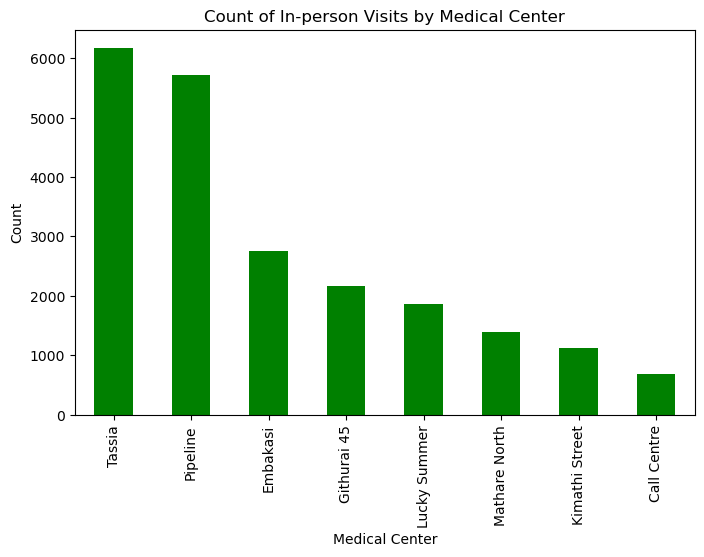

In [29]:
#Filter data for in-person visits
final_df.loc[final_df['visitcategory'] == 'In-person Visit']

# Plot a bar chart
plt.figure(figsize=(8, 5))
sns.countplot=merged_df['medicalcenter'].value_counts().plot(kind='bar', color='green')
plt.title('Count of In-person Visits by Medical Center')
plt.xlabel('Medical Center')
plt.ylabel('Count')
plt.show()

# Profitability for each Payor

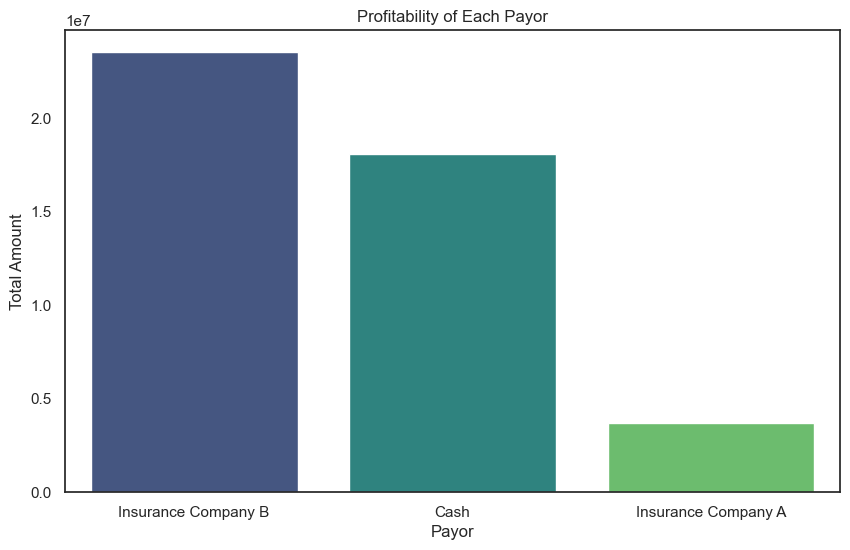

In [30]:
# Group by payor and calculate the total amount for each payor
payor_profitability = final_df.groupby('payor')['amount'].sum().reset_index()

# Sort values in descending order of profitability
payor_profitability = payor_profitability.sort_values(by='amount', ascending=False)

# Set Seaborn style
sns.set(style="white")

# Plot the graph using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='payor', y='amount', data=payor_profitability, palette='viridis')
plt.xlabel('Payor')
plt.ylabel('Total Amount')
plt.title('Profitability of Each Payor')
plt.show()

# Number of visits in medical centres

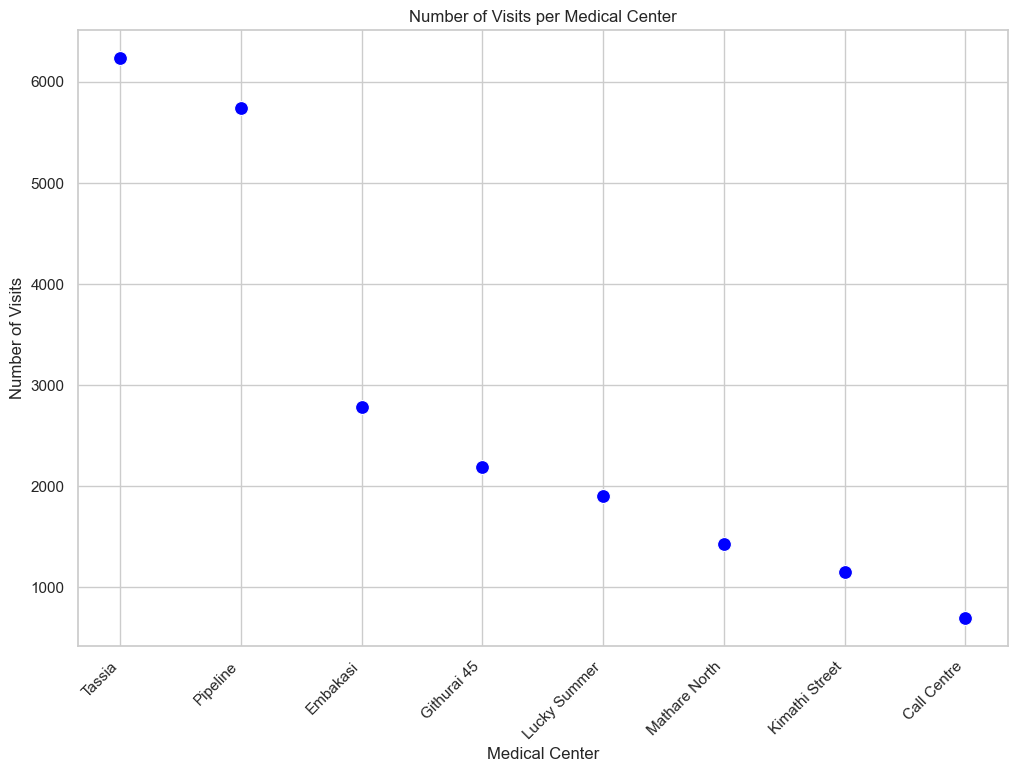

In [31]:
# Count the number of visits per medical center
visits_per_center = final_df['medicalcenter'].value_counts().reset_index()
visits_per_center.columns = ['medicalcenter', 'visit_count']

# Set Seaborn style
sns.set(style="whitegrid")

# Plot the scatter plot using Seaborn
plt.figure(figsize=(12, 8))
sns.scatterplot(x='medicalcenter', y='visit_count', data=visits_per_center, s=100, color='blue')
plt.xlabel('Medical Center')
plt.ylabel('Number of Visits')
plt.title('Number of Visits per Medical Center')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()




# Trends of nps score over months in medical centres

Identify any seasonal trends in NPS scores, enabling you to understand if patient satisfaction tends to vary across different months.

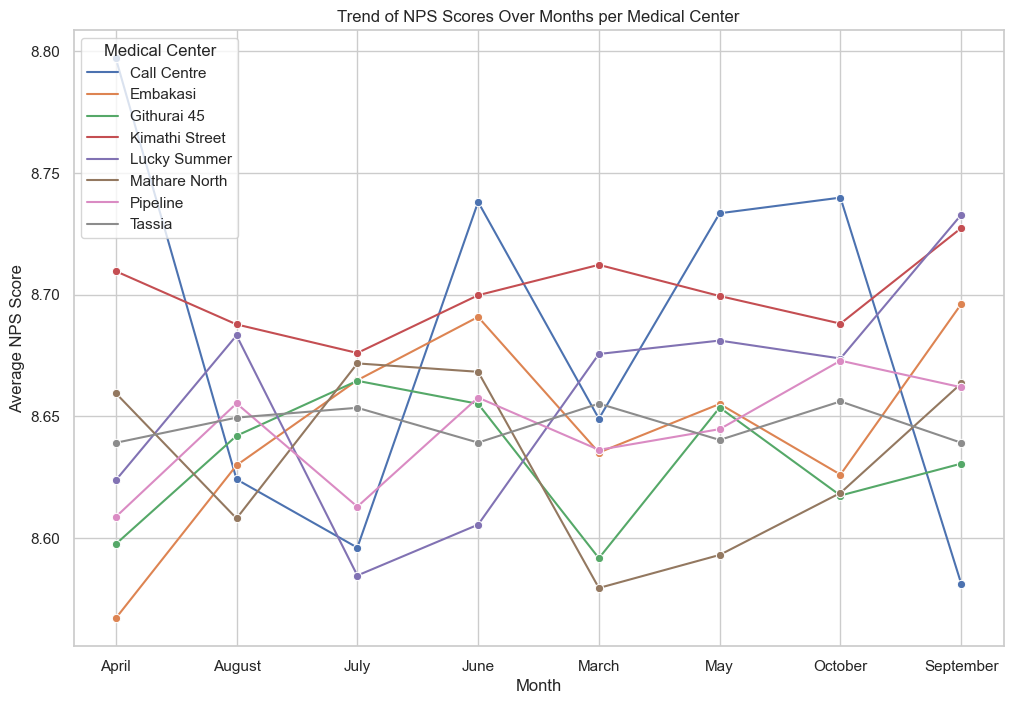

In [32]:
# Set Seaborn style
sns.set(style="whitegrid")

# Group by medical center and month, then calculate the average NPS score
monthly_nps_medical_center = final_df.groupby(['medicalcenter', 'month'])['nps score'].mean().reset_index()

# Plot the trend of NPS scores over months for each medical center
plt.figure(figsize=(12, 8))
sns.lineplot(x='month', y='nps score', hue='medicalcenter', data=monthly_nps_medical_center, marker='o')
plt.title('Trend of NPS Scores Over Months per Medical Center')
plt.xlabel('Month')
plt.ylabel('Average NPS Score')
plt.legend(title='Medical Center')
plt.show()

# Profits realisesd in each medical centres

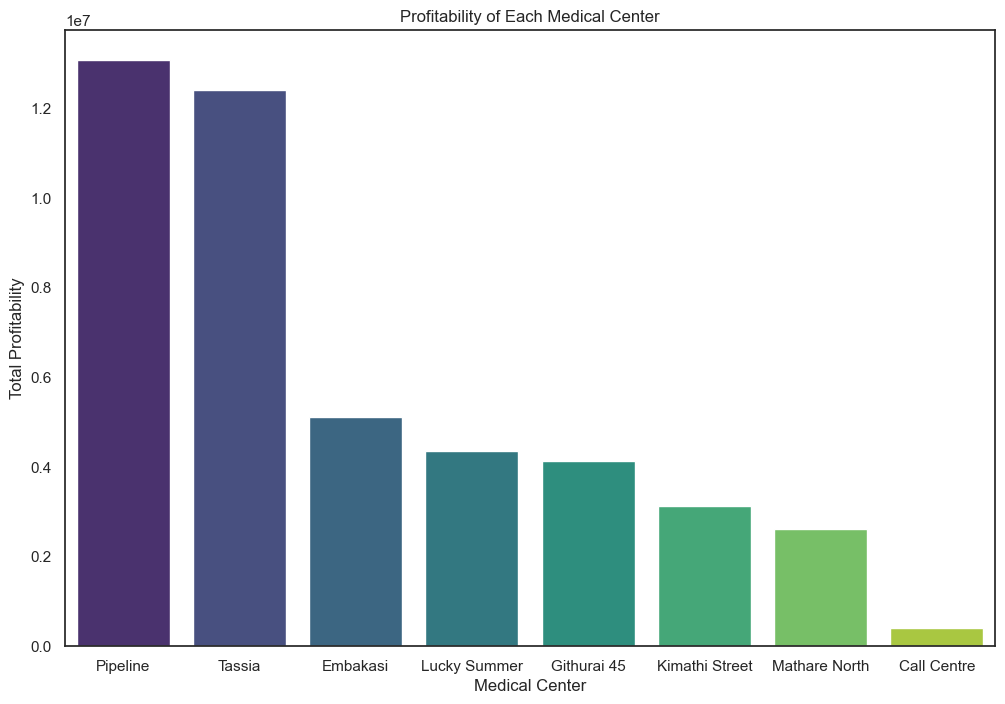

In [33]:
# Group by medical center and calculate the total amount for each
medical_center_profitability = final_df.groupby('medicalcenter')['amount'].sum().reset_index()

# Sort values by total amount in descending order
medical_center_profitability = medical_center_profitability.sort_values(by='amount', ascending=False)

# Set Seaborn style
sns.set(style="white")

# Plot the graph using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='medicalcenter', y='amount', data=medical_center_profitability, palette='viridis')
plt.xlabel('Medical Center')
plt.ylabel('Total Profitability')
plt.title('Profitability of Each Medical Center')
plt.show()

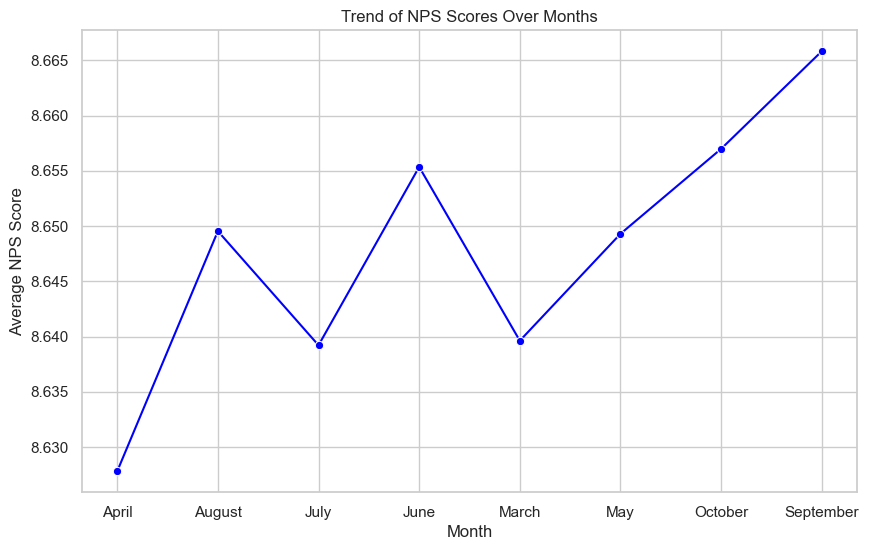

In [34]:
sns.set(style="whitegrid")

# Group by month and calculate the average NPS score
monthly_nps = final_df.groupby('month')['nps score'].mean().reset_index()

# Plot the trend of NPS scores over months
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='nps score', data=monthly_nps, marker='o', color='blue')
plt.title('Trend of NPS Scores Over Months')
plt.xlabel('Month')
plt.ylabel('Average NPS Score')
plt.show()